# Data Exploration

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

In [43]:
test = np.load("./Data/test_images.npy")
test.shape

(10000, 28, 28)

In [44]:
train = np.load("./Data/train_images.npy")
train.shape

(60000, 28, 28)

In [45]:
labels = pd.read_csv("./Data/train_labels.csv")
labels.shape

(60000, 1)

In [46]:
train_X = train[:50000]
test_X = train[50000:]
train_y = labels[:50000].to_numpy()
test_y = labels[50000:].to_numpy()

Text(0.5, 1.0, 'Data Distribution')

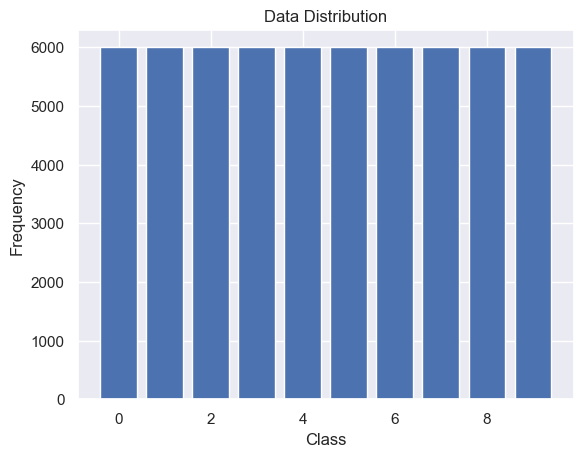

In [47]:
classes, frequency = np.unique(labels, return_counts=True)
plt.bar(classes, frequency)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Data Distribution")

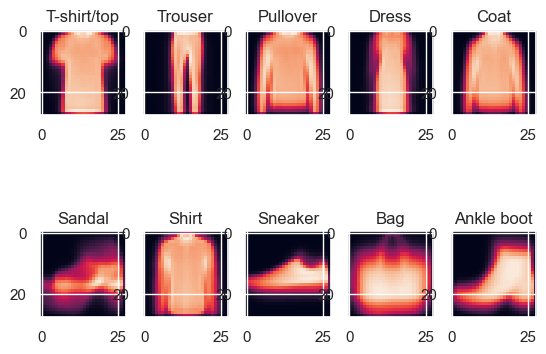

In [48]:
fig, axs = plt.subplots(2, 5)
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
meanImg = [train[labels.label.values == k].mean(axis=0).reshape(28,28) for k in range(10)]
for i in range(2):
    for j in range(5):
        axs[i][j].set_title(classes[5*i+j])
        axs[i][j].imshow(meanImg[5*i+j])

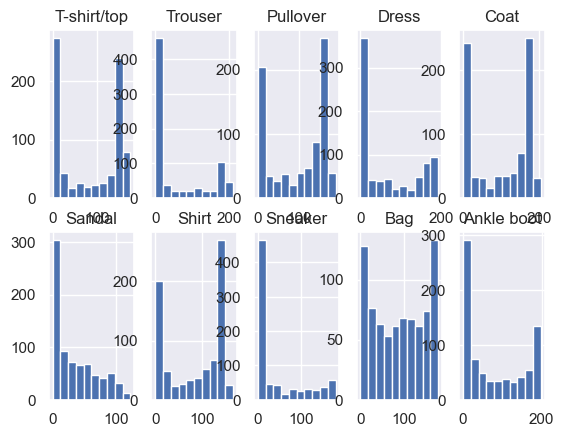

In [49]:
fig, axs = plt.subplots(2, 5)
for i in range(2):
    for j in range(5):
        axs[i][j].set_title(classes[5*i+j])
        lst = meanImg[5*i+j].flatten()
        axs[i][j].hist(lst)

Extra Analysis

In [18]:
data = train / 255.0
target = labels
data.shape

(60000, 28, 28)

In [27]:
import umap

embedding = umap.UMAP().fit_transform(data, y=target)

SystemError: initialization of _internal failed without raising an exception

ValueError: 'c' argument has 7840000 elements, which is inconsistent with 'x' and 'y' with size 28.

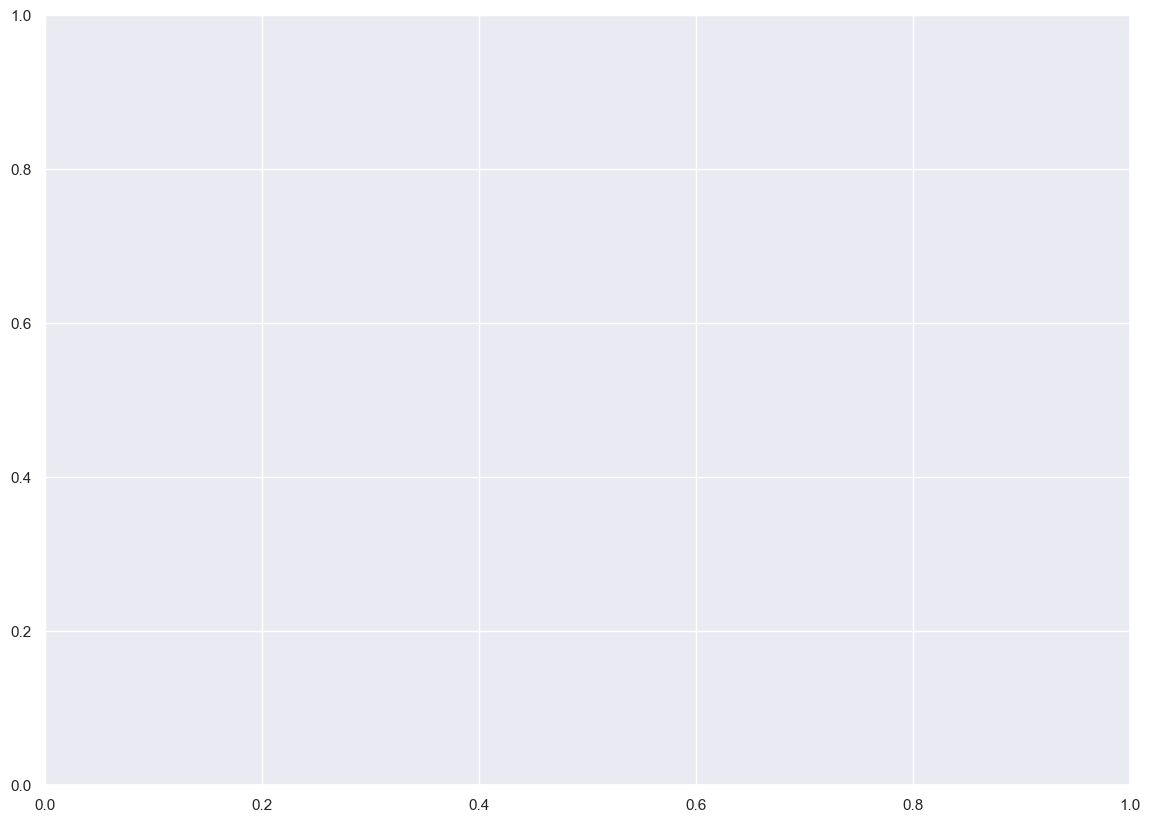

In [276]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.1, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Embedded via UMAP using Labels');

# Model Exploration

In [97]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import GlorotNormal, GlorotUniform, RandomNormal
from tensorflow.keras.losses import CategoricalCrossentropy, KLDivergence

In [98]:
y_sparse_train = [[0 if train_y[i]!=j else 1 for j in range(len(classes))] for i in range(len(train_y))]
y_sparse_train = np.array(y_sparse_train)
y_sparse_test = [[0 if test_y[i]!=j else 1 for j in range(len(classes))] for i in range(len(test_y))]
y_sparse_test = np.array(y_sparse_test)

Base model

In [128]:
callback = EarlyStopping(monitor='accuracy', patience=3)
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(BatchNormalization())
model.add(Dense(40, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization_10 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_44 (Dense)            (None, 40)                31400     
                                                                 
 batch_normalization_11 (Bat  (None, 40)               160       
 chNormalization)                                                
                                                                 
 dense_45 (Dense)            (None, 10)                410       
                                                                 
Total params: 35,106
Trainable params: 33,458
Non-tra

In [129]:
model.compile(loss = CategoricalCrossentropy(), optimizer=Adam(learning_rate=0.0002), metrics=["accuracy"])

In [130]:
history = model.fit(x= train_X, y = y_sparse_train, validation_data=(test_X, y_sparse_test), batch_size = 32, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 9s 5ms/step - loss: 0.6432 - accuracy: 0.7801 - auc_8: 0.9767 - val_loss: 0.4550 - val_accuracy: 0.8414 - val_auc_8: 0.9876
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4638 - accuracy: 0.8379 - auc_8: 0.9868 - val_loss: 0.4146 - val_accuracy: 0.8531 - val_auc_8: 0.9893
Epoch 3/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4178 - accuracy: 0.8529 - auc_8: 0.9891 - val_loss: 0.4013 - val_accuracy: 0.8575 - val_auc_8: 0.9897
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3966 - accuracy: 0.8590 - auc_8: 0.9900 - val_loss: 0.3813 - val_accuracy: 0.8642 - val_auc_8: 0.9904
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3792 - accuracy: 0.8664 - auc_8: 0.9907 - val_loss: 0.3742 - val_accuracy: 0.8660 - val_auc_8: 0.9907
Epoch 6/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3693 - accuracy: 0.8

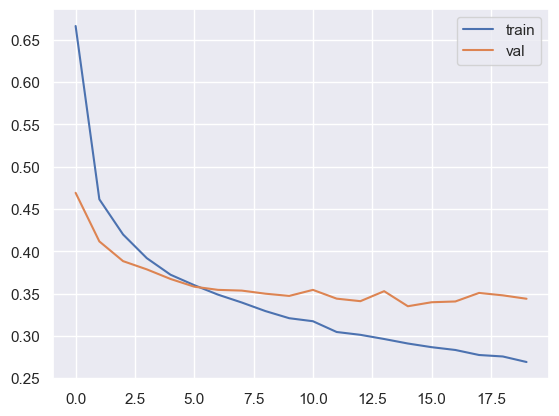

In [124]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.legend()
plt.show()

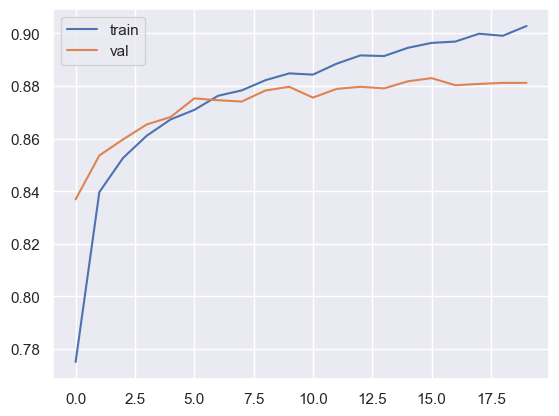

In [125]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.legend()
plt.show()